#                                                                                     Lab n°2

# 1) Data Import

In [1]:
from datasets import load_dataset
from string import punctuation
from heapq import nlargest
import re

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
train_dataset = load_dataset("imdb", split="train").to_pandas()
test_dataset = load_dataset("imdb", split="test").to_pandas()

Reusing dataset imdb (C:\Users\matth\.cache\huggingface\datasets\imdb\plain_text\1.0.0\2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)
Reusing dataset imdb (C:\Users\matth\.cache\huggingface\datasets\imdb\plain_text\1.0.0\2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)


1) How many splits does the dataset has? (1 point)

The Dataset has 3 split, a train split, a test split and a split containing unlabelized image

2) How big are these splits? (1 point)

The train split has 25000 reviews, the unsupervised split has 50000 reviews and the test split has 25000 reviews.

3) What is the proportion of each class on the supervised splits? (1 point)

There is a 50/50 repartition between positive reviews (i.e 1) and negative reviews (i.e 0) in both supervised splits. For each splits and each class there are 12500 reviews.

In [3]:
test_label = test_dataset.groupby('label')
test_label.count()

,text
label,
0,12500
1,12500


In [4]:
train_label = train_dataset.groupby('label')
train_label.count()

,text
label,
0,12500
1,12500


## Pre treatment

1. (2 points) Take a look at the data and create an adapted preprocessing function which at least

In [5]:
def pre_treatment(data):
    ''' Put our data in lowercase, remove the punctuation and the stop words'''
    stops = set(stopwords.words('english'))
    stemmer = SnowballStemmer("english")
    re_word = re.compile(r"^\w+$")
    data['text'] = data['text'].str.lower()
    data['text'] = data['text'].str.replace('[{}]'.format(punctuation),'')
    data['text_no_stop'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stops)]))
    data['text_steam'] = data['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x) if re_word.match(word)]))
    
pre_treatment(test_dataset)
pre_treatment(train_dataset)

C:\Users\matth\AppData\Local\Temp\ipykernel_10920\2990260509.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace('[{}]'.format(punctuation),'')
C:\Users\matth\AppData\Local\Temp\ipykernel_10920\2990260509.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace('[{}]'.format(punctuation),'')


## Creation of our model

Importation of library for our model

In [6]:
#Creating our model
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#TfidfVectorizer is capable of doing both word count vectorization and IDF calculations.
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

2. (4 points) Implement and train a naive Bayes classifier on the training data

In [7]:
text_pip = Pipeline([('vect', CountVectorizer()), ('clf', MultinomialNB()) ])
text_pip.fit(train_dataset['text'],train_dataset['label'])

Pipeline(steps=[('vect', CountVectorizer()), ('clf', MultinomialNB())])

C:\Users\matth\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


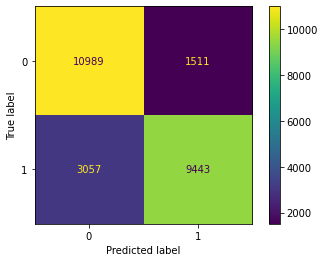

In [8]:
def prediction(data,col):
    text_pip.predict(data[col])
    metrics.plot_confusion_matrix(text_pip,data[col],data['label'])
    plt.show()
prediction(test_dataset,'text')

C:\Users\matth\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


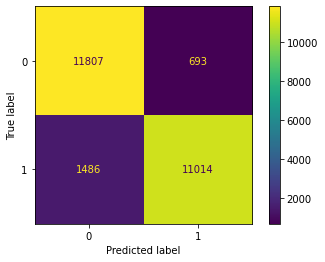

In [9]:
prediction(train_dataset,'text')

3. (1 point) Report the accuracy on both training and test set ?

In [10]:
pred = text_pip.predict(test_dataset['text'])
pred_train = text_pip.predict(train_dataset['text'])
print('Accuracy is ' + str(np.mean(pred == test_dataset.label)))
print('Accuracy is ' + str(np.mean(pred_train == train_dataset.label)))

Accuracy is 0.81728
Accuracy is 0.91284


4. (1 point) Why is accuracy a sufficient measure of evaluation here?

The accuracy is a good measure in our case since our dataset is well balanced. Each type of label has a similar amount of data allowing a better representation

5. [Bonus] What are the top 10 most important words (features) for each class?

## Mots les plus important

In [11]:
def most_important_word():
    wordscount = text_pip[0].get_feature_names()
    importance = text_pip[1].feature_log_prob_
    k=10
    nmax = nlargest(k, enumerate(importance[0]), key=lambda x:x[1])
    i=0
    while i < k:
        print(wordscount[nmax[i][0]])
        i = i+1
most_important_word()

the
and
of
to
is
in
this
it
that
br


C:\Users\matth\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The most important words are useless small words. To resolve this problem we will remove them from every text.

## Removing of the stops words

In [12]:
stops = set(stopwords.words('english'))
train_dataset['text_no_stop'] = train_dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stops)]))
test_dataset['text_no_stop'] = test_dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stops)]))
train_dataset

,text,label,text_no_stop,text_steam
0,i rented i am curiousyellow from my video stor...,0,rented curiousyellow video store controversy s...,i rent i am curiousyellow from my video store ...
1,i am curious yellow is a risible and pretentio...,0,curious yellow risible pretentious steaming pi...,i am curious yellow is a risibl and pretenti s...
2,if only to avoid making this type of film in t...,0,avoid making type film future film interesting...,if onli to avoid make this type of film in the...
3,this film was probably inspired by godards mas...,0,film probably inspired godards masculin fémini...,this film was probabl inspir by godard masculi...
4,oh brotherafter hearing about this ridiculous ...,0,oh brotherafter hearing ridiculous film umptee...,oh brotheraft hear about this ridicul film for...
...,...,...,...,...
24995,a hit at the time but now better categorised a...,1,hit time better categorised australian cult fi...,a hit at the time but now better categoris as ...
24996,i love this movie like no other another time i...,1,love movie like another time try explain virtu...,i love this movi like no other anoth time i wi...
24997,this film and its sequel barry mckenzie holds ...,1,film sequel barry mckenzie holds two greatest ...,this film and it sequel barri mckenzi hold his...
24998,the adventures of barry mckenzie started life ...,1,adventures barry mckenzie started life satiric...,the adventur of barri mckenzi start life as a ...


C:\Users\matth\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


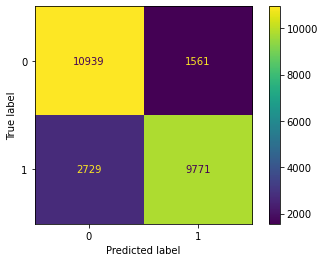

In [13]:
prediction(test_dataset,'text_no_stop')

In [14]:
pred = text_pip.predict(test_dataset['text'])
pred_train = text_pip.predict(train_dataset['text'])
print('Accuracy is ' + str(np.mean(pred == test_dataset.label)))

Accuracy is 0.81728


In [15]:
text_pip.fit(train_dataset['text_no_stop'],train_dataset['label'])

Pipeline(steps=[('vect', CountVectorizer()), ('clf', MultinomialNB())])

In [16]:
most_important_word()

br
movie
film
one
like
even
good
bad
would
really


C:\Users\matth\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


We can see that the accuracy is slightly better.

## Adding some steaming

1. (2 points) Add stemming or lemmatization to your pretreatment.

In [17]:
stemmer = SnowballStemmer("english")
re_word = re.compile(r"^\w+$")
train_dataset['text_steam'] = train_dataset['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x) if re_word.match(word)]))
test_dataset['text_steam'] = test_dataset['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x) if re_word.match(word)]))

In [18]:
text_pip.fit(train_dataset['text_steam'],train_dataset['label'])

Pipeline(steps=[('vect', CountVectorizer()), ('clf', MultinomialNB())])

C:\Users\matth\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


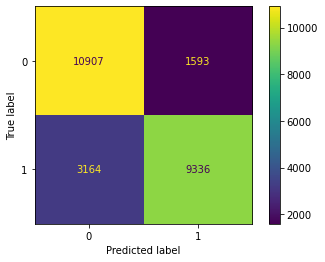

In [19]:
prediction(test_dataset,'text_steam')

In [20]:
pred_steam = text_pip.predict(test_dataset['text_steam'])
print('Accuracy is ' + str(np.mean(pred == test_dataset.label)))

Accuracy is 0.81728
